In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

In [29]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn.compose import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import linear_model
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.utils import *
#from xgboost import XGBClassifier

import h2o
from dgpylib import dg_athena
from dgpylib import dg_s3

%run 'functions.ipynb'

### Setting renaming and drop columns list

In [30]:
ren_lst_col = {
'AreaCode': 'areacode',
'HPI_AveragePrice': 'HPIAvgPrice',
'HPI_SalesVolume': 'HPISalesVolume',
'LAD_code': 'lad_code',
'LAD_name': 'lad_name',
'ONS_%people_working_49+': '%people_working_49+',
'ONS_%people_working_FT': '%people_working_FT',
'ONS_%people_working_sum': '%people_working_sum',
'ONS_avg_age': 'avg_age',
'ONS_avg_bedrooms': 'avg_bedrooms',
'ONS_avg_dependent_children_per_family': 'ons_avg_dependent_children_per_family',
'ONS_avg_distance_travelled_to_work(km)': 'avg_distance_travelled_to_work(km)',
'ONS_avg_household_size': 'avg_household_size',
'ONS_avg_rooms': 'avg_rooms',
'ONS_bedrooms per rooms': 'bedrooms per rooms',
'ONS_n_families': 'n_families',
'ONS_n_families/n_households': 'n_families_over_n_households',
'ONS_n_families_per_population': 'n_families_per_population',
'ONS_n_households': 'n_households',
'ONS_occupation_rate': 'occupation_rate',
'ONS_population': 'population',
'ONS_population_density': 'population_density',
'ONS_postcode_sector': 'ons_postcode_sector',
'PriceDiff%': 'pricediff%',
'RegionName': 'regionname',
'buseventcode': 'BusinessEventCode',
'claimamountfiveyeartotal': 'ClaimAmount5YearTotal',
'claimamountoneyeartotal': 'ClaimAmount1YearTotal',
'claimamountthreeyeartotal': 'ClaimAmount3YearTotal',
'claimpastfiveyearcount': 'ClaimPast5YearCount',
'claimpastoneyearcount': 'ClaimPast1YearCount',
'claimpastthreeyearcount': 'ClaimPast3YearCount',
'claimsamount': 'claimsamount',
'claimscount': 'claimscount',
'clientaccountdesc': 'ClientAccountDesc',
'clientgroupdesc': 'ClientGroupDesc',
'cocode': 'CompanyCode',
'contract_age': 'contract_age',
'contractcompanycode': 'contractcompanycode',
'contractcreateddate': 'contractcreateddate',
'contractdimensionid': 'contractdimensionid',
'contracteventdatetime': 'contracteventdatetime',
'contracteventdayssinceoffer': 'contracteventdayssinceoffer',
'contractnumber': 'contractnumber',
'contractschemecode': 'contractschemecode',
'contractstatuscode': 'contractstatuscode',
'country': 'country',
'datemonth': 'datemonth',
'dedup': 'dedup',
'diallerinteractionid': 'diallerinteractionid',
'diamond': 'diamond',
'fee': 'Fee',
'gross': 'gross',
'itemcategoryname': 'itemcategoryname',
'itemcategoryname_dup': 'itemcategoryname_dup',
'itemdiamondcopyid': 'itemdiamondcopyid',
'itemdiamondcopyid_imputed': 'itemdiamondcopyid_imputed',
'itemdimensionid': 'itemdimensionid',
'itemgoldencopyid': 'itemgoldencopyid',
'itemgoodscatcode': 'GoodsColour',
'itemgoodscategoryname': 'itemgoodscategoryname',
'itemlocationpostcode': 'itemlocationpostcode',
'itemlocationpostcode_dup': 'itemlocationpostcode_dup',
'itemmodelnumber': 'itemmodelnumber',
'itemmodelnumber_dup': 'itemmodelnumber_dup',
'itemmodelnumber_imputed': 'itemmodelnumber_imputed',
'itempurchasedatetime': 'itempurchasedatetime',
'itempurchaseprice': 'itempurchaseprice',
'itemserialnumber': 'itemserialnumber',
'itemsupercategorycode': 'itemsupercategorycode',
'manufacturerbrandname': 'manufacturerbrandname',
'manufacturerbrandname_dup': 'manufacturerbrandname_dup',
'manufacturergroupname': 'manufacturergroupname',
'modelid': 'modelid',
'movementdate': 'movementdate',
'offer_itemdimensionid': 'offer_itemdimensionid',
'offer_persondimensionid': 'offer_persondimensionid',
'offer_request_time': 'offer_request_time',
'offeracceptedindicator': 'offeracceptedindicator',
'offeracceptedprice': 'offeracceptedprice',
'offerbusinesseventcode': 'offerbusinesseventcode',
'offerbusinesseventsourcename': 'offerbusinesseventsourcename',
'offercampaignname': 'offercampaignname',
'offerchannelname': 'offerchannelname',
'offerclientname': 'offerclientname',
'offereffectivedatetime': 'CurrentDate',
'offereffectiveweek': 'offereffectiveweek',
'offerendofguaranteeflag': 'offerendofguaranteeflag',
'offermanufacturerendofguaranteedate': 'offermanufacturerendofguaranteedate',
'offerperiodofcover': 'offerperiodofcover',
'offerpostcode': 'offerpostcode',
'offerreferencenumber': 'offerreferencenumber',
'offersourcereceiveddatetime': 'offersourcereceiveddatetime',
'offerstatusname': 'offerstatusname',
'offertotalprice': 'offertotalprice',
'pcds': 'pcds',
'perh_id': 'perh_id',
'perhid': 'perhid',
'periodofcover': 'POC',
'person_persondimensionid': 'person_persondimensionid',
'personaddresspostcode': 'PerPostalAddrPostCode',
'persondisabilitycategory': 'persondisabilitycategory',
'persongender': 'persongender',
'persongoldencopyid': 'persongoldencopyid',
'persongoldencopyid_dup': 'persongoldencopyid_dup',
'personstatus': 'personstatus',
'planaccdate': 'planaccdate',
'planlivecount': 'PlanLiveCount',
'planno': 'planno',
'plansacceptedpastfiveyearcount': 'PlansAcceptedPast5YearCount',
'plansacceptedpastoneyearcount': 'PlansAcceptedPast1YearCount',
'plansactivepastfiveyearcount': 'PlansActivePast5yrCount',
'plansactivepastoneyearcount': 'PlansActivePast1yrCount',
'planscancelledpastfiveyearcount': 'PlansCancelledPast5YearCount',
'planscancelledpastoneyearcount': 'PlansCancelledPast1YearCount',
'planstatus': 'planstatus',
'pmhid': 'pmhid',
'postcode_sector': 'postcode_sector',
'predictedconversionrate': 'predictedconversionrate',
'prevrtppricetype': 'PrevRTPPriceType',
'prhidfk': 'prhidfk',
'price_dff_bands': 'price_dff_bands',
'price_diff': 'price_diff',
'pricingversiondescription': 'pricingversiondescription',
'rec_status': 'rec_status',
'recordstatus': 'recordstatus',
'region': 'region',
'requested_appliancecode': 'ApplianceCode',
'requested_clientcode': 'ClientCode',
'requested_clientgroupcode': 'ClientGroupCode',
'requested_itemmanufbrandcode': 'ManufacturerBrandCode',
'requested_manugteeperiodlabourmonths': 'ManufacturerGuaranteeLabourMonths',
'requested_manugteeperiodpartsmonths': 'ManufacturerGuaranteePartsMonths',
'requested_purchaprice': 'PurchasePrice',
'requested_purchasedate': 'PurchaseDate',
'retentionflag': 'RetentionFlag',
'routetomarketname': 'RouteToMarketName',
'row_dedup': 'row_dedup',
'sale': 'sale',
'sale_dedup': 'sale_dedup',
'schcode': 'SchemeCode',
'schemetypename': 'SchemeTypeName',
'totalprice': 'totalprice',
'year': 'year'
}

drop_lst_col= ['areacode','regionname','claimsamount','claimscount','contract_age','contractcompanycode','contractcreateddate','contractdimensionid','contracteventdatetime','contracteventdayssinceoffer','contractnumber','contractschemecode','contractstatuscode','country','datemonth','dedup','diallerinteractionid','diamond','gross'
               ,'itemcategoryname','itemcategoryname_dup','itemdiamondcopyid','itemdiamondcopyid_imputed','itemdimensionid','itemgoldencopyid','itemgoodscategoryname','itemlocationpostcode','itemlocationpostcode_dup','itemmodelnumber','itemmodelnumber_dup','itemmodelnumber_imputed','itempurchasedatetime','itempurchaseprice'
               ,'itemserialnumber','itemsupercategorycode','manufacturerbrandname','manufacturerbrandname_dup','manufacturergroupname','modelid','movementdate','offer_itemdimensionid','offer_persondimensionid','offer_request_time','offeracceptedindicator','offeracceptedprice','offerbusinesseventcode','offerbusinesseventsourcename'
               ,'offercampaignname','offerchannelname','offerclientname','offereffectiveweek','offerendofguaranteeflag','offermanufacturerendofguaranteedate','offerperiodofcover','offerpostcode','offerreferencenumber','offersourcereceiveddatetime','offerstatusname','pcds','perh_id','perhid','person_persondimensionid'
               ,'persondisabilitycategory','persongender','persongoldencopyid','persongoldencopyid_dup','personstatus','planaccdate','pmhid','postcode_sector','prhidfk','price_dff_bands','pricediff%','rec_status','recordstatus','region','sale_dedup','year'
               , 'lad_code', 'lad_name', 'BusinessEventCode', 'ons_postcode_sector'
               , 'CompanyCode', 'SchemeCode', 'planno', 'planstatus']



### Importing dataset from S3, applying reneming and dropping columns

In [31]:
# initialising our class
conn = dg_s3.Connect('s3://dgdatadump/DS&CA/Pricing/02 Projects/2022/Tel_Reg_2.0/processed_data/')

# to list the files in our folder
print(conn.get_list())

# read earnix file
df0= conn.read('TelReg_072022_merged.csv')
df0.rename(columns=ren_lst_col, inplace=True)
df0.drop(columns=drop_lst_col, inplace= True)

#To Int
for col in ['ClaimPast1YearCount', 'ClaimPast3YearCount', 'ClaimPast5YearCount', 'PlanLiveCount', 'PlansAcceptedPast1YearCount', 'PlansAcceptedPast5YearCount', 'PlansActivePast1yrCount', 'PlansActivePast5yrCount', 'PlansCancelledPast1YearCount', 'PlansCancelledPast5YearCount']:
    df0[col]= df0[col].astype('Int64')

#To Datetime
df0['CurrentDate'] = pd.to_datetime(df0['CurrentDate']) 
df0['PurchaseDate'] = pd.to_datetime(df0['PurchaseDate'])  

#New features
df0['HasPrevRTPPrice'] = np.where(df0['PrevRTPPriceType'].isna(), 'N', 'Y')
df0['AppAge'] = (df0['CurrentDate'] - df0['PurchaseDate']) / np.timedelta64(1, 'D')
df0['relFee'] = df0['Fee']/ df0['PurchasePrice']
df0['relFeeInc'] = df0['price_diff']/ df0['PurchasePrice']
df0['PaymentType']= 'DD'

#Replacing NA's
for col in ['ClaimPast1YearCount', 'ClaimPast3YearCount', 'ClaimPast5YearCount', 'PlanLiveCount', 'PlansAcceptedPast1YearCount', 'PlansAcceptedPast5YearCount', 'PlansActivePast1yrCount', 'PlansActivePast5yrCount', 'PlansCancelledPast1YearCount', 'PlansCancelledPast5YearCount'
            , 'ClaimAmount1YearTotal', 'ClaimAmount3YearTotal', 'ClaimAmount5YearTotal']:
    df0[col]= df0[col].fillna(0)

df0[df0.columns.sort_values()].head()

['Goodscolour_LUT.csv', 'ItemCatName_LUT.csv', 'Itemsupcatcode_LUT.csv', 'Jan2022Live_Earnix.csv', 'TelRegBase20220409_3.csv', 'TelRegBase20220429.csv', 'TelReg_072022_merged.csv', 'TelReg_Live_31Jan2022.csv', 'TelReg_Live_Unfiltered_Jan2022.csv', 'TelReg_Modelling_Ahmad1.csv', 'TelReg_Modelling_sampledEOG.csv', 'Tel_Reg_Earnix_Data_Table_Ahmad.csv', 'Tel_Reg_Earnix_Data_Table_BQ.csv', 'Tel_Reg_Earnix_Data_Table_JAN_UPDATED_BQ.csv', 'Tel_Reg_Final_Table_Combined_072022.csv', 'Tel_Reg_Final_Table_Combined_072022_1.csv', 'clientname_LUT.csv', 'manufaturename_LUT.csv', 'sy_daily_telreg.csv', 'telreg_final.csv', 'train_test.csv']


,%people_working_49+,%people_working_FT,%people_working_sum,AppAge,ApplianceCode,ClaimAmount1YearTotal,ClaimAmount3YearTotal,ClaimAmount5YearTotal,ClaimPast1YearCount,ClaimPast3YearCount,ClaimPast5YearCount,ClientAccountDesc,ClientCode,ClientGroupCode,ClientGroupDesc,CurrentDate,Fee,GoodsColour,HPIAvgPrice,HPISalesVolume,HasPrevRTPPrice,ManufacturerBrandCode,ManufacturerGuaranteeLabourMonths,ManufacturerGuaranteePartsMonths,POC,PaymentType,PerPostalAddrPostCode,PlanLiveCount,PlansAcceptedPast1YearCount,PlansAcceptedPast5YearCount,PlansActivePast1yrCount,PlansActivePast5yrCount,PlansCancelledPast1YearCount,PlansCancelledPast5YearCount,PrevRTPPriceType,PurchaseDate,PurchasePrice,RetentionFlag,RouteToMarketName,SchemeTypeName,avg_age,avg_bedrooms,avg_distance_travelled_to_work(km),avg_household_size,avg_rooms,bedrooms per rooms,n_families,n_families_over_n_households,n_families_per_population,n_households,occupation_rate,offertotalprice,ons_avg_dependent_children_per_family,population,population_density,predictedconversionrate,price_diff,pricingversiondescription,relFee,relFeeInc,row_dedup,sale,totalprice
0,0.189873,0.730003,3463.0,2.0,AW,0.0,0.0,0.00,0,0,0,HOTPOINT,343,138,WHIRLPOOL,2022-02-17,60.00,W,299078.595673,659.444444,Y,HOTP,12,120,12,DD,SN10 2SE,0,0,0,0,0,0,0,NEW_BUSINESS,2022-02-15,389.99,0,REG,TELEPHONE REGISTRATION,44.977333,2.842672,17.2,2.258261,5.601652,0.507470,1934.0,0.694684,0.252546,2784.0,0.564834,60.00,0.789555,7658.0,2.4,1.00,0.000000,ASIS FEE,0.153850,0.000000,1,1,60.00
1,0.264825,0.724971,1698.0,310.0,A-,0.0,0.0,0.00,0,0,0,HOOVER,151,120,HOOVER CANDY GROUP,2022-03-03,63.84,W,129270.945836,136.111111,N,HOOV,12,12,12,DD,BL7 0PN,0,0,0,0,0,0,0,NaN,2021-04-27,499.00,0,REG,TELEPHONE REGISTRATION,48.574586,3.252830,19.4,2.400000,6.547170,0.496830,1025.0,0.773585,0.468464,1325.0,1.133511,46.44,0.673171,2188.0,0.7,1.00,-0.272556,FEE +-30%,0.127936,-0.000546,1,1,46.44
2,0.148715,0.703552,4645.0,0.0,D-,0.0,0.0,0.00,0,0,0,HOOVER,151,120,HOOVER CANDY GROUP,2022-04-06,47.16,W,211487.041000,166.333333,N,HOOV,12,120,12,DD,IP1 5HS,0,0,3,0,3,0,3,NaN,2022-04-06,379.99,0,REG,TELEPHONE REGISTRATION,42.175597,2.629090,12.1,2.355317,5.022751,0.523436,2723.0,0.696063,0.282527,3912.0,0.630514,42.48,0.834007,9638.0,36.1,0.24,-0.099237,TEL REG OPT TARGET 27%,0.124109,-0.000261,1,1,42.48
3,0.192506,0.714782,4891.0,47.0,TD,0.0,0.0,82.13,0,0,1,BEKO,351,296,BEKO,2022-04-20,39.48,W,211888.291800,898.222222,N,BEKO,12,12,12,DD,LS18 5QU,2,1,2,2,6,0,4,NaN,2022-03-04,249.00,0,REG,TELEPHONE REGISTRATION,45.097956,2.981504,13.5,2.243574,5.703339,0.522765,2781.0,0.668028,0.267352,4163.0,0.580396,39.48,0.710176,10402.0,20.0,1.00,0.000000,ASIS FEE,0.158554,0.000000,1,1,39.48
4,0.204387,0.706574,5872.0,0.0,CH,0.0,0.0,0.00,0,0,0,ELECTROLUX,4,168,ELECTROLUX GROUP,2022-05-20,34.68,W,165270.733600,243.222222,Y,ELUX,24,24,12,DD,NG13 8ZD,0,0,0,0,0,0,0,NEW_BUSINESS,2022-05-20,300.00,0,REG,TELEPHONE REGISTRATION,47.087690,3.080762,21.0,2.336473,6.076754,0.506975,3592.0,0.719840,0.373933,4990.0,0.869668,34.68,0.794543,9606.0,2.3,1.00,0.000000,ASIS FEE,0.115600,0.000000,1,1,34.68


In [5]:
#df0.to_csv('TelReg_072022_processed.csv', index=False)

In [32]:
#dtypes
x= df0.dtypes.to_frame().reset_index()
x.columns = ['ColName', 'dtype']
x= x.sort_values(by= 'ColName')

#missing
y= df0.isna().sum().to_frame().reset_index()
y.columns = ['ColName', 'Na_rows']
y= y.sort_values(by= 'ColName')

#describe
d= df0.describe(percentiles= [.1, .9, .95, .975]).T.reset_index()
d.columns = ['ColName', 'count', 'mean', 'std', 'min', '10%', '50%', '90%', '95%', '97.5%', 'max']
d= d.sort_values(by= 'ColName')

#join
z= x.merge(y, on= 'ColName', how= 'left').merge(d, on='ColName', how= 'left')
z['N'] = df0.shape[0]
z['Na_miss_rate'] = (z['Na_rows'] / z['N']) * 100

z['dtype'] = z['dtype'].astype('str')

fltr= z['dtype'].isin(['float64'])
z.style.format('{:,.2f}', subset=['mean', 'std', 'min', '10%', '50%', '90%', '95%', '97.5%', 'max', 'Na_miss_rate']).format('{:,.0f}', subset=['N', 'Na_rows', 'count'])

,ColName,dtype,Na_rows,count,mean,std,min,10%,50%,90%,95%,97.5%,max,N,Na_miss_rate
0,%people_working_49+,float64,0,"789,251",0.20,0.06,0.04,0.13,0.19,0.31,0.31,0.31,0.60,"789,251",0.00
1,%people_working_FT,float64,0,"789,251",0.71,0.04,0.21,0.66,0.71,0.74,0.76,0.78,0.93,"789,251",0.00
2,%people_working_sum,float64,0,"789,251","3,910.67","1,770.41",23.00,"1,211.12","3,912.28","6,255.00","7,024.00","7,684.00","12,079.00","789,251",0.00
3,AppAge,float64,0,"789,251",57.88,131.74,0.00,0.00,8.00,181.00,365.00,455.00,"1,216.00","789,251",0.00
4,ApplianceCode,object,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"789,251",0.00
5,ClaimAmount1YearTotal,float64,0,"789,251",23.16,128.76,0.00,0.00,0.00,0.00,119.69,263.00,"10,970.67","789,251",0.00
6,ClaimAmount3YearTotal,float64,0,"789,251",55.31,263.00,0.00,0.00,0.00,86.48,325.49,624.02,"17,202.86","789,251",0.00
7,ClaimAmount5YearTotal,float64,0,"789,251",80.58,358.46,0.00,0.00,0.00,166.72,480.75,890.50,"24,974.13","789,251",0.00
8,ClaimPast1YearCount,Int64,0,"789,251",0.18,0.79,0.00,0.00,0.00,0.00,1.00,2.00,38.00,"789,251",0.00
9,ClaimPast3YearCount,Int64,0,"789,251",0.45,1.79,0.00,0.00,0.00,1.00,3.00,5.00,147.00,"789,251",0.00


In [33]:
df0.groupby('pricingversiondescription').aggregate(
    Offers= ('pricingversiondescription', 'count')    
    , optPrice= ('offertotalprice', 'mean')
    , salerate= ('sale', 'mean')
    , predictprob= ('predictedconversionrate', 'mean')
).reset_index().style.format('£ {:,.2f}', subset=['optPrice']).format('{:,.3f}', subset=['salerate', 'predictprob'])

,pricingversiondescription,Offers,optPrice,salerate,predictprob
0,ASIS FEE,338486,£ 46.57,0.223,1.000
1,FEE +-30%,79443,£ 46.32,0.221,1.000
2,TEL REG GLM (SHINEGAMI) OPT TARGET MAX,28251,£ 52.02,0.197,0.207
3,TEL REG GLM_ISO (SHINEGAMI) OPT TARGET 23,33834,£ 49.58,0.205,0.222
4,TEL REG HYBRID (EUNICE) OPT TARGET 23,33557,£ 51.00,0.206,0.217
5,TEL REG HYBRID (EUNICE) OPT TARGET MAX,29048,£ 52.86,0.197,0.208
6,TEL REG HYBRID OPT TARGET 21.56%,40539,£ 48.57,0.212,0.217
7,TEL REG OPT TARGET 27%,206093,£ 49.13,0.213,0.259


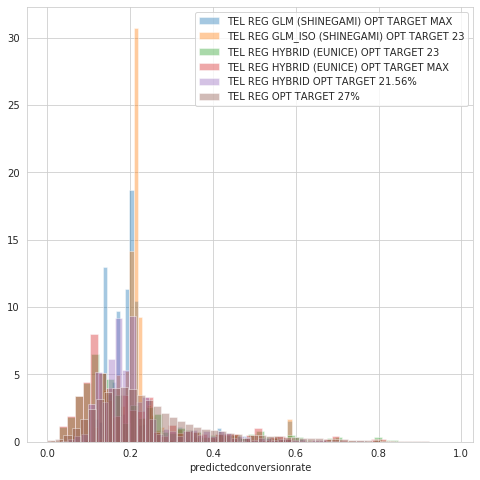

In [34]:
fig, ax = plt.subplots(figsize= (8, 8))
for m in ['TEL REG GLM (SHINEGAMI) OPT TARGET MAX', 'TEL REG GLM_ISO (SHINEGAMI) OPT TARGET 23', 'TEL REG HYBRID (EUNICE) OPT TARGET 23', 'TEL REG HYBRID (EUNICE) OPT TARGET MAX', 'TEL REG HYBRID OPT TARGET 21.56%', 'TEL REG OPT TARGET 27%']:    
    sns.distplot(df0[(df0['pricingversiondescription'] == m)]['predictedconversionrate'], label= m, kde= False, norm_hist= True, ax= ax)
plt.legend()

In [35]:
mods= ['TEL REG GLM (SHINEGAMI) OPT TARGET MAX', 'TEL REG GLM_ISO (SHINEGAMI) OPT TARGET 23', 'TEL REG HYBRID (EUNICE) OPT TARGET 23', 'TEL REG HYBRID (EUNICE) OPT TARGET MAX', 'TEL REG HYBRID OPT TARGET 21.56%', 'TEL REG OPT TARGET 27%']
aux= []

for b in mods:
    fltr1= (df0['pricingversiondescription'] == b)
    temp= df0[fltr1]

    fpr, tpr, thresholds = metrics.roc_curve(temp['sale'], temp['predictedconversionrate'])
    gmean = thresholds[np.argmax(np.sqrt(tpr * (1 - fpr)))]
    #youdenJ = thresholds[np.argmax(tpr - fpr)]
    temp['predictedflag'] = np.where(temp['predictedconversionrate'] > gmean, 1, 0)

    auc= roc_auc_score(temp['sale'], temp['predictedconversionrate'])        
    accuracy= accuracy_score(temp['sale'], temp['predictedflag'])
    f1= f1_score(temp['sale'], temp['predictedflag'], average='binary')
    mcc= matthews_corrcoef(temp['sale'], temp['predictedflag'])        

    rnl_rate= temp['sale'].mean()
    rnl_prob= temp['predictedconversionrate'].mean()
    avg_OffFee= temp['totalprice'].mean()
    #avg_WrtFee= temp['offeracceptedprice'].mean()

    offers= temp['row_dedup'].count()        

    row= {
        'batchType': b, 'Offers': offers, 'Auc': auc, 'Accuracy': accuracy, 'F1': f1, 'Mcc': mcc, 'conv_rate': rnl_rate, 'conv_prob': rnl_prob, 'avg_OffFee': avg_OffFee#, 'avg_WrtFee': avg_WrtFee
         }
    aux.append(row)

df_result= pd.DataFrame(data= aux)

df_result['conv_gap']= df_result['conv_prob'] / df_result['conv_rate'] -1
df_result['expected_income']= df_result['Offers'] * df_result['conv_prob'] * df_result['avg_OffFee']
#df_result['actual_income']= df_result['Offers'] * df_result['conv_rate'] * df_result['avg_WrtFee']

df_result['income_gap_£']= df_result['expected_income'] - df_result['expected_income']
df_result['income_gap_%']= (df_result['income_gap_£'] / df_result['expected_income'])

df_result= df_result.reindex(['batchType', 'Offers', 'Auc', 'Accuracy', 'F1', 'Mcc', 'conv_rate', 'conv_prob', 'conv_gap', 'avg_OffFee', 'avg_WrtFee', 'expected_income', 'income_gap_£', 'income_gap_%'], axis= 1) #'actual_income', 

df_result.style.format('£ {:,.0f}', subset=['expected_income', 'income_gap_£']).format('£ {:,.2f}', subset=['avg_OffFee', 'avg_WrtFee']).format('{:,.3f}', subset=['conv_rate', 'conv_prob', 'conv_gap', 'income_gap_%']).format('{:,.3f}', subset=['Auc', 'Accuracy', 'F1', 'Mcc'])

,batchType,Offers,Auc,Accuracy,F1,Mcc,conv_rate,conv_prob,conv_gap,avg_OffFee,avg_WrtFee,expected_income,income_gap_£,income_gap_%
0,TEL REG GLM (SHINEGAMI) OPT TARGET MAX,28251,0.593,0.665,0.318,0.111,0.197,0.207,0.048,£ 51.95,£ nan,"£ 303,724",£ 0,0.000
1,TEL REG GLM_ISO (SHINEGAMI) OPT TARGET 23,33834,0.587,0.673,0.318,0.111,0.205,0.222,0.084,£ 49.50,£ nan,"£ 372,545",£ 0,0.000
2,TEL REG HYBRID (EUNICE) OPT TARGET 23,33557,0.725,0.742,0.476,0.318,0.206,0.217,0.056,£ 50.95,£ nan,"£ 371,535",£ 0,0.000
3,TEL REG HYBRID (EUNICE) OPT TARGET MAX,29048,0.717,0.722,0.447,0.284,0.197,0.208,0.056,£ 52.77,£ nan,"£ 319,569",£ 0,0.000
4,TEL REG HYBRID OPT TARGET 21.56%,40539,0.664,0.648,0.402,0.194,0.212,0.217,0.024,£ 48.51,£ nan,"£ 426,761",£ 0,0.000
5,TEL REG OPT TARGET 27%,206093,0.683,0.671,0.424,0.228,0.213,0.259,0.218,£ 49.07,£ nan,"£ 2,621,048",£ 0,0.000


### Categorcial features


In [36]:
cat_features = [f for f in df0.select_dtypes(include=['object']).columns.sort_values() if f not in ['CurrentDate', 'PurchaseDate', 'ons_postcode_sector', 'PerPostalAddrPostCode', 'RouteToMarketName', 'PrevRTPPriceType', 'SchemeTypeName']]
#df0[features].head()
group_low_freq(df= df0, lst= cat_features, pct=2.5)
#cat_plot_no_pred(df= df0.sample(frac= .5), feat_lst= cat_features, rows= int(np.ceil(len(cat_features)/6)), cols= 6, target= 'sale', y= 'row_dedup')

### Numerical features

In [37]:
num_features = [f for f in df0.select_dtypes(include=['int32', 'int64', 'float64']).columns.sort_values() if f not in ['planno']]
for col in num_features:
    df0[col]= df0[col].clip(upper= np.quantile(df0[col], q= 0.95))
    df0[col]= df0[col].clip(lower= np.quantile(df0[col], q= 0.05))
#df0[features].head()

#num_plot_no_pred(df= df0.sample(frac= .01), feat_lst= num_features, rows= int(np.ceil(len(num_features)/6)), cols= 6, target= 'sale', y= 'row_dedup', nbins= 15)

In [38]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ODeepLearningEstimator
from h2o.grid.metrics import *
from h2o.grid.grid_search import H2OGridSearch
from h2o.display import H2ODisplay

#h2o.shutdown()
h2o.init(max_mem_size= '32g')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 35 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,"1 year, 3 months and 5 days !!!"
H2O_cluster_name:,H2O_from_python_root_vd1pni
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,28.12 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [39]:
target = 'sale'

void = ['sale', 'row_dedup', 'CurrentDate', 'PurchaseDate', 'ons_postcode_sector', 'PerPostalAddrPostCode', 'RouteToMarketName', 'PrevRTPPriceType', 'SchemeTypeName'
        , 'pricingversiondescription', 'predictedconversionrate', 'totalprice', 'offertotalprice', 'PaymentType', 'ClientGroupCode'
        , 'ClaimAmount1YearTotal', 'ClaimAmount3YearTotal', 'ClaimPast1YearCount', 'ClaimPast3YearCount'
]

features = [f for f in df0[cat_features + num_features].select_dtypes(include=['int32', 'int64', 'float64', 'object']).columns.sort_values() if f not in void] # 'int32', 'int64', 'float64', 'object'
print(features)

['%people_working_49+', '%people_working_FT', '%people_working_sum', 'AppAge', 'ApplianceCode', 'ClaimAmount5YearTotal', 'ClaimPast5YearCount', 'ClientAccountDesc', 'ClientCode', 'ClientGroupDesc', 'Fee', 'GoodsColour', 'HPIAvgPrice', 'HPISalesVolume', 'HasPrevRTPPrice', 'ManufacturerBrandCode', 'ManufacturerGuaranteeLabourMonths', 'ManufacturerGuaranteePartsMonths', 'POC', 'PlanLiveCount', 'PlansAcceptedPast1YearCount', 'PlansAcceptedPast5YearCount', 'PlansActivePast1yrCount', 'PlansActivePast5yrCount', 'PlansCancelledPast1YearCount', 'PlansCancelledPast5YearCount', 'PurchasePrice', 'RetentionFlag', 'avg_age', 'avg_bedrooms', 'avg_distance_travelled_to_work(km)', 'avg_household_size', 'avg_rooms', 'bedrooms per rooms', 'n_families', 'n_families_over_n_households', 'n_families_per_population', 'n_households', 'occupation_rate', 'ons_avg_dependent_children_per_family', 'population', 'population_density', 'price_diff', 'relFee', 'relFeeInc']


In [40]:
df1= df0[df0['pricingversiondescription'] != 'ASIS FEE']

df_h2o = h2o.H2OFrame(df1[features + [target]])

train, valid = df_h2o.split_frame([.7], seed= 1234)

for col in [target, [f for f in df1[features].select_dtypes(include=['object']).columns.sort_values() if f not in []]]:
    train[col] = train[col].asfactor()
    valid[col] = valid[col].asfactor()

print(target)
print(features)

Parse progress: |█████████████████████████████████████████████████████████| 100%
sale
['%people_working_49+', '%people_working_FT', '%people_working_sum', 'AppAge', 'ApplianceCode', 'ClaimAmount5YearTotal', 'ClaimPast5YearCount', 'ClientAccountDesc', 'ClientCode', 'ClientGroupDesc', 'Fee', 'GoodsColour', 'HPIAvgPrice', 'HPISalesVolume', 'HasPrevRTPPrice', 'ManufacturerBrandCode', 'ManufacturerGuaranteeLabourMonths', 'ManufacturerGuaranteePartsMonths', 'POC', 'PlanLiveCount', 'PlansAcceptedPast1YearCount', 'PlansAcceptedPast5YearCount', 'PlansActivePast1yrCount', 'PlansActivePast5yrCount', 'PlansCancelledPast1YearCount', 'PlansCancelledPast5YearCount', 'PurchasePrice', 'RetentionFlag', 'avg_age', 'avg_bedrooms', 'avg_distance_travelled_to_work(km)', 'avg_household_size', 'avg_rooms', 'bedrooms per rooms', 'n_families', 'n_families_over_n_households', 'n_families_per_population', 'n_households', 'occupation_rate', 'ons_avg_dependent_children_per_family', 'population', 'population_density

In [41]:
print(train['sale'].isfactor())

train['sale'].mean()

[True]


[0.211149547631719]

In [42]:
def model_perf_stats(model, train, valid):
    # Performance statistics
    perf1 = model.model_performance(train)
    perf2 = model.model_performance(valid)
    #print('Target: {:.5f}').format(train[target].mean())
    print('MCC: {:.5f} / {:.5f}'.format(perf1.mcc()[0][1], perf2.mcc()[0][1]))
    print('F1: {:.5f} / {:.5f}'.format(perf1.F1()[0][1], perf2.F1()[0][1]))
    print('AUC: {:.5f} / {:.5f}'.format(perf1.auc(), perf2.auc()))
    print('AUC PR: {:.5f} / {:.5f}'.format(perf1.aucpr(), perf2.aucpr()))
    print('Accuracy: {:.5f} / {:.5f}'.format(perf1.accuracy()[0][1], perf2.accuracy()[0][1]))
    print('Logloss: {:.5f} / {:.5f}'.format(perf1.logloss(), perf2.logloss()))
    print('KS: {:.5f}'.format(model.kolmogorov_smirnov()))

In [43]:
def model_plots(model, df, target):
    pred = model.predict(h2o.H2OFrame(df[features + [target]]))['p1'].as_data_frame()
    pred = pred.rename(columns= {'p1': 'predictions'})
    df_pred= pd.concat([df.reset_index(drop= True), pred.reset_index(drop= True)], axis= 1)

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 2, figsize= (20, 8))
    ax = plt.subplot(1, 2, 1)
    x= df_pred.groupby(pd.qcut(df_pred['predictions'], 20, duplicates= 'drop'), as_index=True, observed=True)[[target, 'predictions']].mean()
    x= x.rename_axis('Bin').reset_index()
    sns.lineplot(data= x[[target, 'predictions']], lw=2, ax=ax)
    
    ax = plt.subplot(1, 2, 2)
    sns.histplot(data= df_pred, x= 'predictions', stat= 'density', ax= ax)
    

### GLM

In [44]:
h2o.remove('glm_grid_logistic')

# GLM hyperparameters
glm_params = {'alpha': [1e-4] #list(np.linspace(0.01, .99, 10))
            , 'lambda': [1e-4] #list(np.linspace(0.01, .99, 10))
            , 'missing_values_handling': ['MeanImputation']
             }

search_params = {'strategy': 'RandomDiscrete', 'max_models': 100, 'seed': 1, 'max_runtime_secs': 60*15, 'stopping_metric': "logloss", 'stopping_tolerance': 0.0001, 'stopping_rounds': 5}
glm_grid_logistic = H2OGridSearch(model=H2OGeneralizedLinearEstimator, grid_id='glm_grid_logistic', hyper_params=glm_params, search_criteria=search_params) # 
glm_grid_logistic.train(x = features, y = target, training_frame=train, validation_frame=valid, family = 'binomial', link = 'logit', nfolds=5, fold_assignment="random", keep_cross_validation_predictions=True, remove_collinear_columns=True#, compute_p_values=True, standardize= True
#                         , interaction_pairs = interaction_pairs, interactions = interaction_list
                        ) # <- this section is needed to allow ensembling models

glm_gridperf = glm_grid_logistic.get_grid(sort_by='logloss', decreasing=False) # Get the grid results, sorted by validation AUC
best_hyper_glm_logistic = glm_gridperf.models[0]

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [45]:
coeftable = best_hyper_glm_logistic._model_json['output']['coefficients_table'].as_data_frame()
coeftable[coeftable['coefficients']>0].style.format('{:.5f}', subset=['coefficients', 'standardized_coefficients']).bar(subset=['coefficients', 'standardized_coefficients'], color='#d65f5f')

,names,coefficients,standardized_coefficients
4,ApplianceCode.CK,0.35244,0.35244
5,ApplianceCode.DW,0.02337,0.02337
6,ApplianceCode.FF,0.01106,0.01106
9,ApplianceCode.HB,0.09266,0.09266
12,ApplianceCode.TD,0.02166,0.02166
14,ClientAccountDesc.AEG,1.16592,1.16592
15,ClientAccountDesc.BEKO,0.69998,0.69998
16,ClientAccountDesc.BOSCH,2.47033,2.47033
17,ClientAccountDesc.BUSH,5.88538,5.88538
18,ClientAccountDesc.DIRECT SALES,0.87309,0.87309


In [46]:
model_perf_stats(best_hyper_glm_logistic, train, valid)

MCC: 0.33549 / 0.32870
F1: 0.48216 / 0.47804
AUC: 0.73685 / 0.73407
AUC PR: 0.46496 / 0.45971
Accuracy: 0.80785 / 0.80681
Logloss: 0.45051 / 0.45210
KS: 0.35772


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


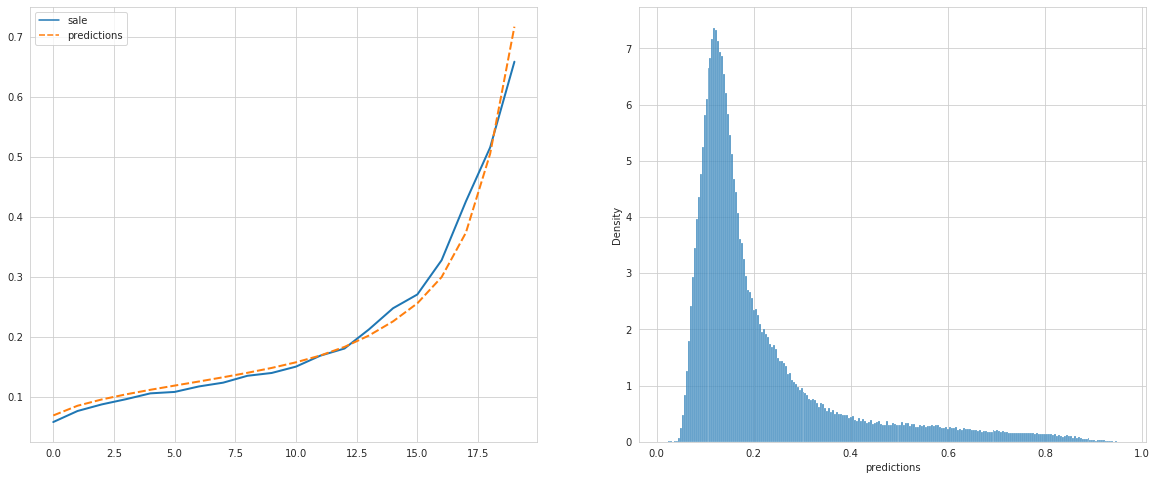

In [47]:
model_plots(best_hyper_glm_logistic, df=df1.sample(frac= .5), target= 'sale')

## Deep Learning

In [48]:
count= 0
for col in cat_features: 
    count= count + len(df1[col].unique())
(count + len(num_features)) # 30

104

In [ ]:
{'distribution': ['bernoulli'],
 'activation': ['RectifierWithDropout'],
 'hidden': [[64, 64]],
 'epochs': [500],
 'adaptive_rate': [False],
 'rate': [0.001],
 'rate_decay': [0.9, 0.95],
 'rate_annealing': [1e-06],
 'momentum_start': [0.95, 0.975],
 'momentum_ramp': [100000.0],
 'momentum_stable': [0.99],
 'nesterov_accelerated_gradient': [False],
 'input_dropout_ratio': [0.2],
 'hidden_dropout_ratios': [[0.5, 0.5]],
 'score_training_samples': [5000],
 'score_validation_samples': [5000],
 'l1': [1e-05],
 'l2': [1e-05]}

### Grid search 

In [50]:
# Build and train the model:
#del(dl_grid)
#h2o.remove('dl_grid')
start= time.time()
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

# GLM hyperparameters
dl_params = {
            'distribution': ["bernoulli"]
            , 'activation': ['RectifierWithDropout'] #, 'Rectifier', 'Tanh', 'TanhWithDropout'
            , 'hidden': [[64, 64]]
            , 'epochs': [1000]            
            , 'adaptive_rate': [False]
            , 'rate': [.001]
            , 'rate_decay': [.9]
            , 'rate_annealing': [1e-6]
            , 'momentum_start': [.975]
            , 'momentum_ramp': [1e5]
            , 'momentum_stable': [.99]
            , 'nesterov_accelerated_gradient': [False]
            , 'input_dropout_ratio': [.2]
            , 'hidden_dropout_ratios': [[.5, .5]]
            , 'score_training_samples': [5000]
            , 'score_validation_samples': [5000]
            , 'l1': [1e-5]
            , 'l2': [1e-5]
             }

search_params = {'strategy': 'RandomDiscrete'
                 , 'max_models': 100
                 , 'seed': 1
                 , 'max_runtime_secs': 60*60
                 , 'stopping_metric': "logloss"
                 , 'stopping_tolerance': 0.001
                 , 'stopping_rounds': 5}

dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator, grid_id='dl_grid', hyper_params=dl_params, search_criteria=search_params)
dl_grid.train(x = features, y = target, training_frame=train, validation_frame=valid) # <- this section is needed to allow ensembling models
dl_gridperf = dl_grid.get_grid(sort_by='logloss', decreasing=False) # Get the grid results, sorted by validation AUC
best_hyper_dl = dl_gridperf.models[0]

end= time.time()
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))
print(end-start)

2022-08-25 12:28:39
deeplearning Grid Build progress: |███████████████████████████████████████| 100%
2022-08-25 12:30:02
82.30687355995178


In [51]:
dl_grid
#dl_gridperf
#dl_grid.hyper_names
#dl_grid.hyper_params
#dl_grid.get_hyperparams_dict
#best_hyper_dl

               activation adaptive_rate distribution  epochs    hidden  \
0    RectifierWithDropout         false    bernoulli   500.0  [64, 64]   
1    RectifierWithDropout         false    bernoulli  1000.0  [64, 64]   

  hidden_dropout_ratios input_dropout_ratio      l1      l2 momentum_ramp  \
0            [0.5, 0.5]                 0.2  1.0E-5  1.0E-5      100000.0   
1            [0.5, 0.5]                 0.2  1.0E-5  1.0E-5      100000.0   

  momentum_stable momentum_start nesterov_accelerated_gradient   rate  \
0            0.99          0.975                         false  0.001   
1            0.99          0.975                         false  0.001   

  rate_annealing rate_decay score_training_samples score_validation_samples  \
0         1.0E-6        0.9                   5000                     5000   
1         1.0E-6        0.9                   5000                     5000   

         model_ids              logloss  
0  dl_grid_model_1   0.4727360239717556  
1  

In [52]:
model_perf_stats(best_hyper_dl, train, valid)

MCC: 0.32990 / 0.32572
F1: 0.47879 / 0.47517
AUC: 0.73043 / 0.72850
AUC PR: 0.45598 / 0.45215
Accuracy: 0.80523 / 0.80471
Logloss: 0.45427 / 0.45538
KS: 0.36542


Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


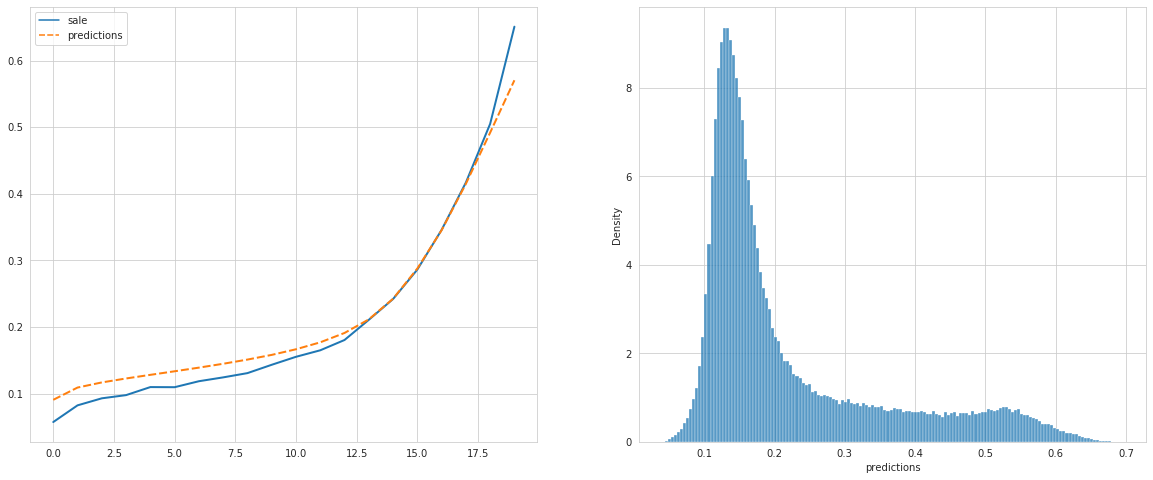

In [53]:
model_plots(best_hyper_dl, df=df1.sample(frac= .5), target= 'sale')

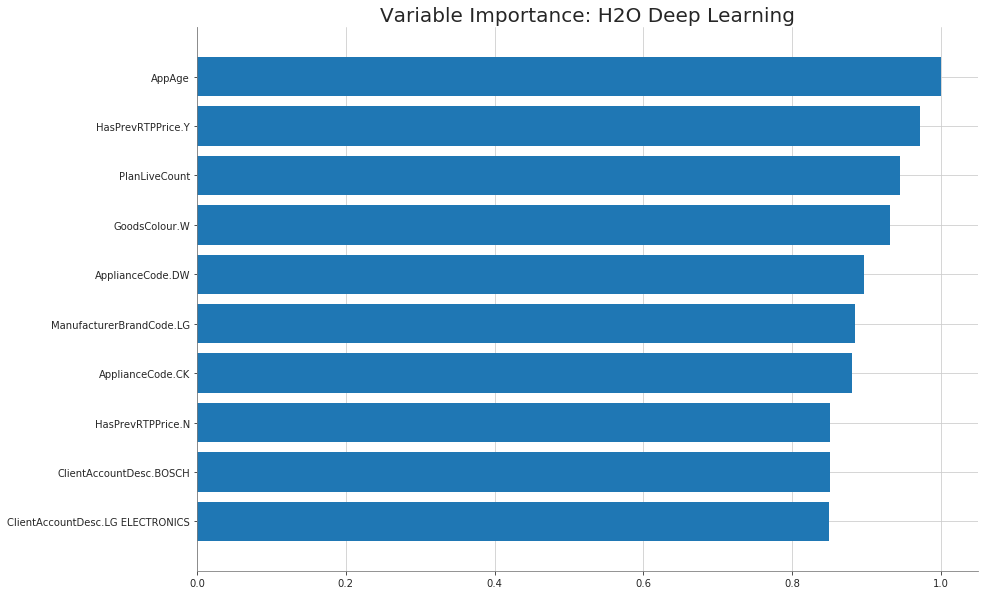

In [54]:
best_hyper_dl.varimp_plot()

In [49]:
dl_grid.get_hyperparams_dict

               activation adaptive_rate distribution epochs    hidden  \
0    RectifierWithDropout         false    bernoulli  500.0  [64, 64]   

  hidden_dropout_ratios input_dropout_ratio      l1      l2 momentum_ramp  \
0            [0.5, 0.5]                 0.2  1.0E-5  1.0E-5      100000.0   

  momentum_stable momentum_start nesterov_accelerated_gradient   rate  \
0            0.99          0.975                         false  0.001   

  rate_annealing rate_decay score_training_samples score_validation_samples  \
0         1.0E-6        0.9                   5000                     5000   

         model_ids             logloss  
0  dl_grid_model_1  0.4727360239717556  


<bound method H2OGridSearch.get_hyperparams_dict of >

In [58]:
dl_checkpoint1 = H2ODeepLearningEstimator(
    activation='RectifierWithDropout'
    , adaptive_rate= False
    , distribution='bernoulli'
    , epochs=2000
    , hidden= [64, 64]
    , hidden_dropout_ratios=[0.5, 0.5]
    , input_dropout_ratio= .2
    , l1= 1e-4 
    , l2= 1e-4                                          
    , momentum_start= .975
    , momentum_ramp= 100000
    , momentum_stable= .99
    , nesterov_accelerated_gradient= False
    , rate= 0.001
    , rate_annealing= 1e-06    
    , rate_decay= 0.9
    #, score_training_samples= -1
    #, score_validation_samples= -1
    
    , model_id='dl_w_checkpoint1'
    , checkpoint='dl_grid_model_1')
dl_checkpoint1.train(x=features, y=target, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [59]:
model_perf_stats(dl_checkpoint1, train, valid)

MCC: 0.33187 / 0.32717
F1: 0.48043 / 0.47776
AUC: 0.73236 / 0.73053
AUC PR: 0.45984 / 0.45600
Accuracy: 0.80595 / 0.80536
Logloss: 0.45257 / 0.45373
KS: 0.34638


Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


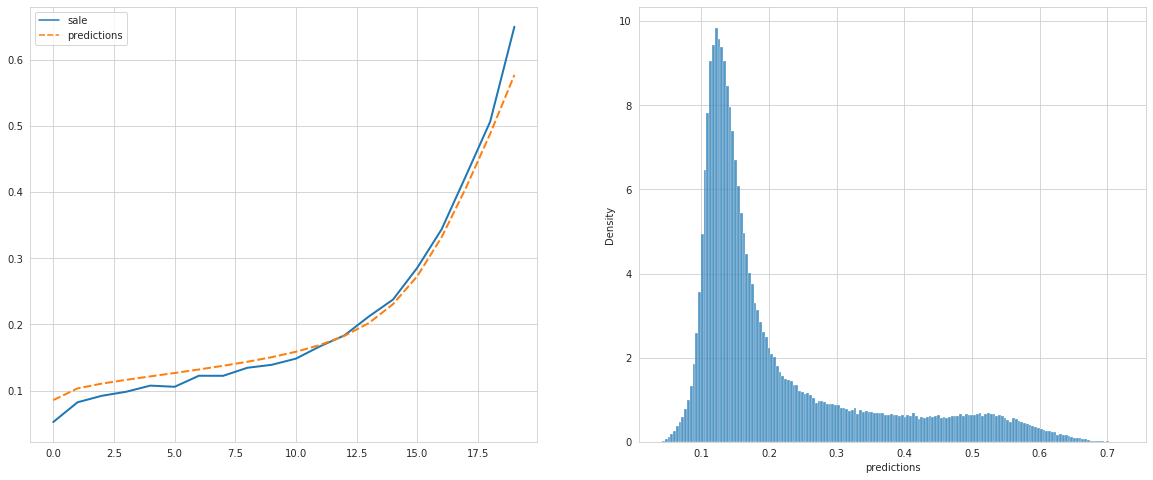

In [60]:
model_plots(dl_checkpoint1, df=df1.sample(frac= .5), target= 'sale')

In [61]:
pred = dl_checkpoint1.predict(h2o.H2OFrame(df1[features + [target]]))['p1'].as_data_frame()
pred = pred.rename(columns= {'p1': 'predictions'})
df_pred= pd.concat([df1.reset_index(drop= True), pred.reset_index(drop= True)], axis= 1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


In [121]:
#dl_checkpoint1.partial_plot(data = train, cols = ["Fee","price_diff"], server=False, plot = True, plot_stddev=False)

<Figure size 432x288 with 0 Axes>

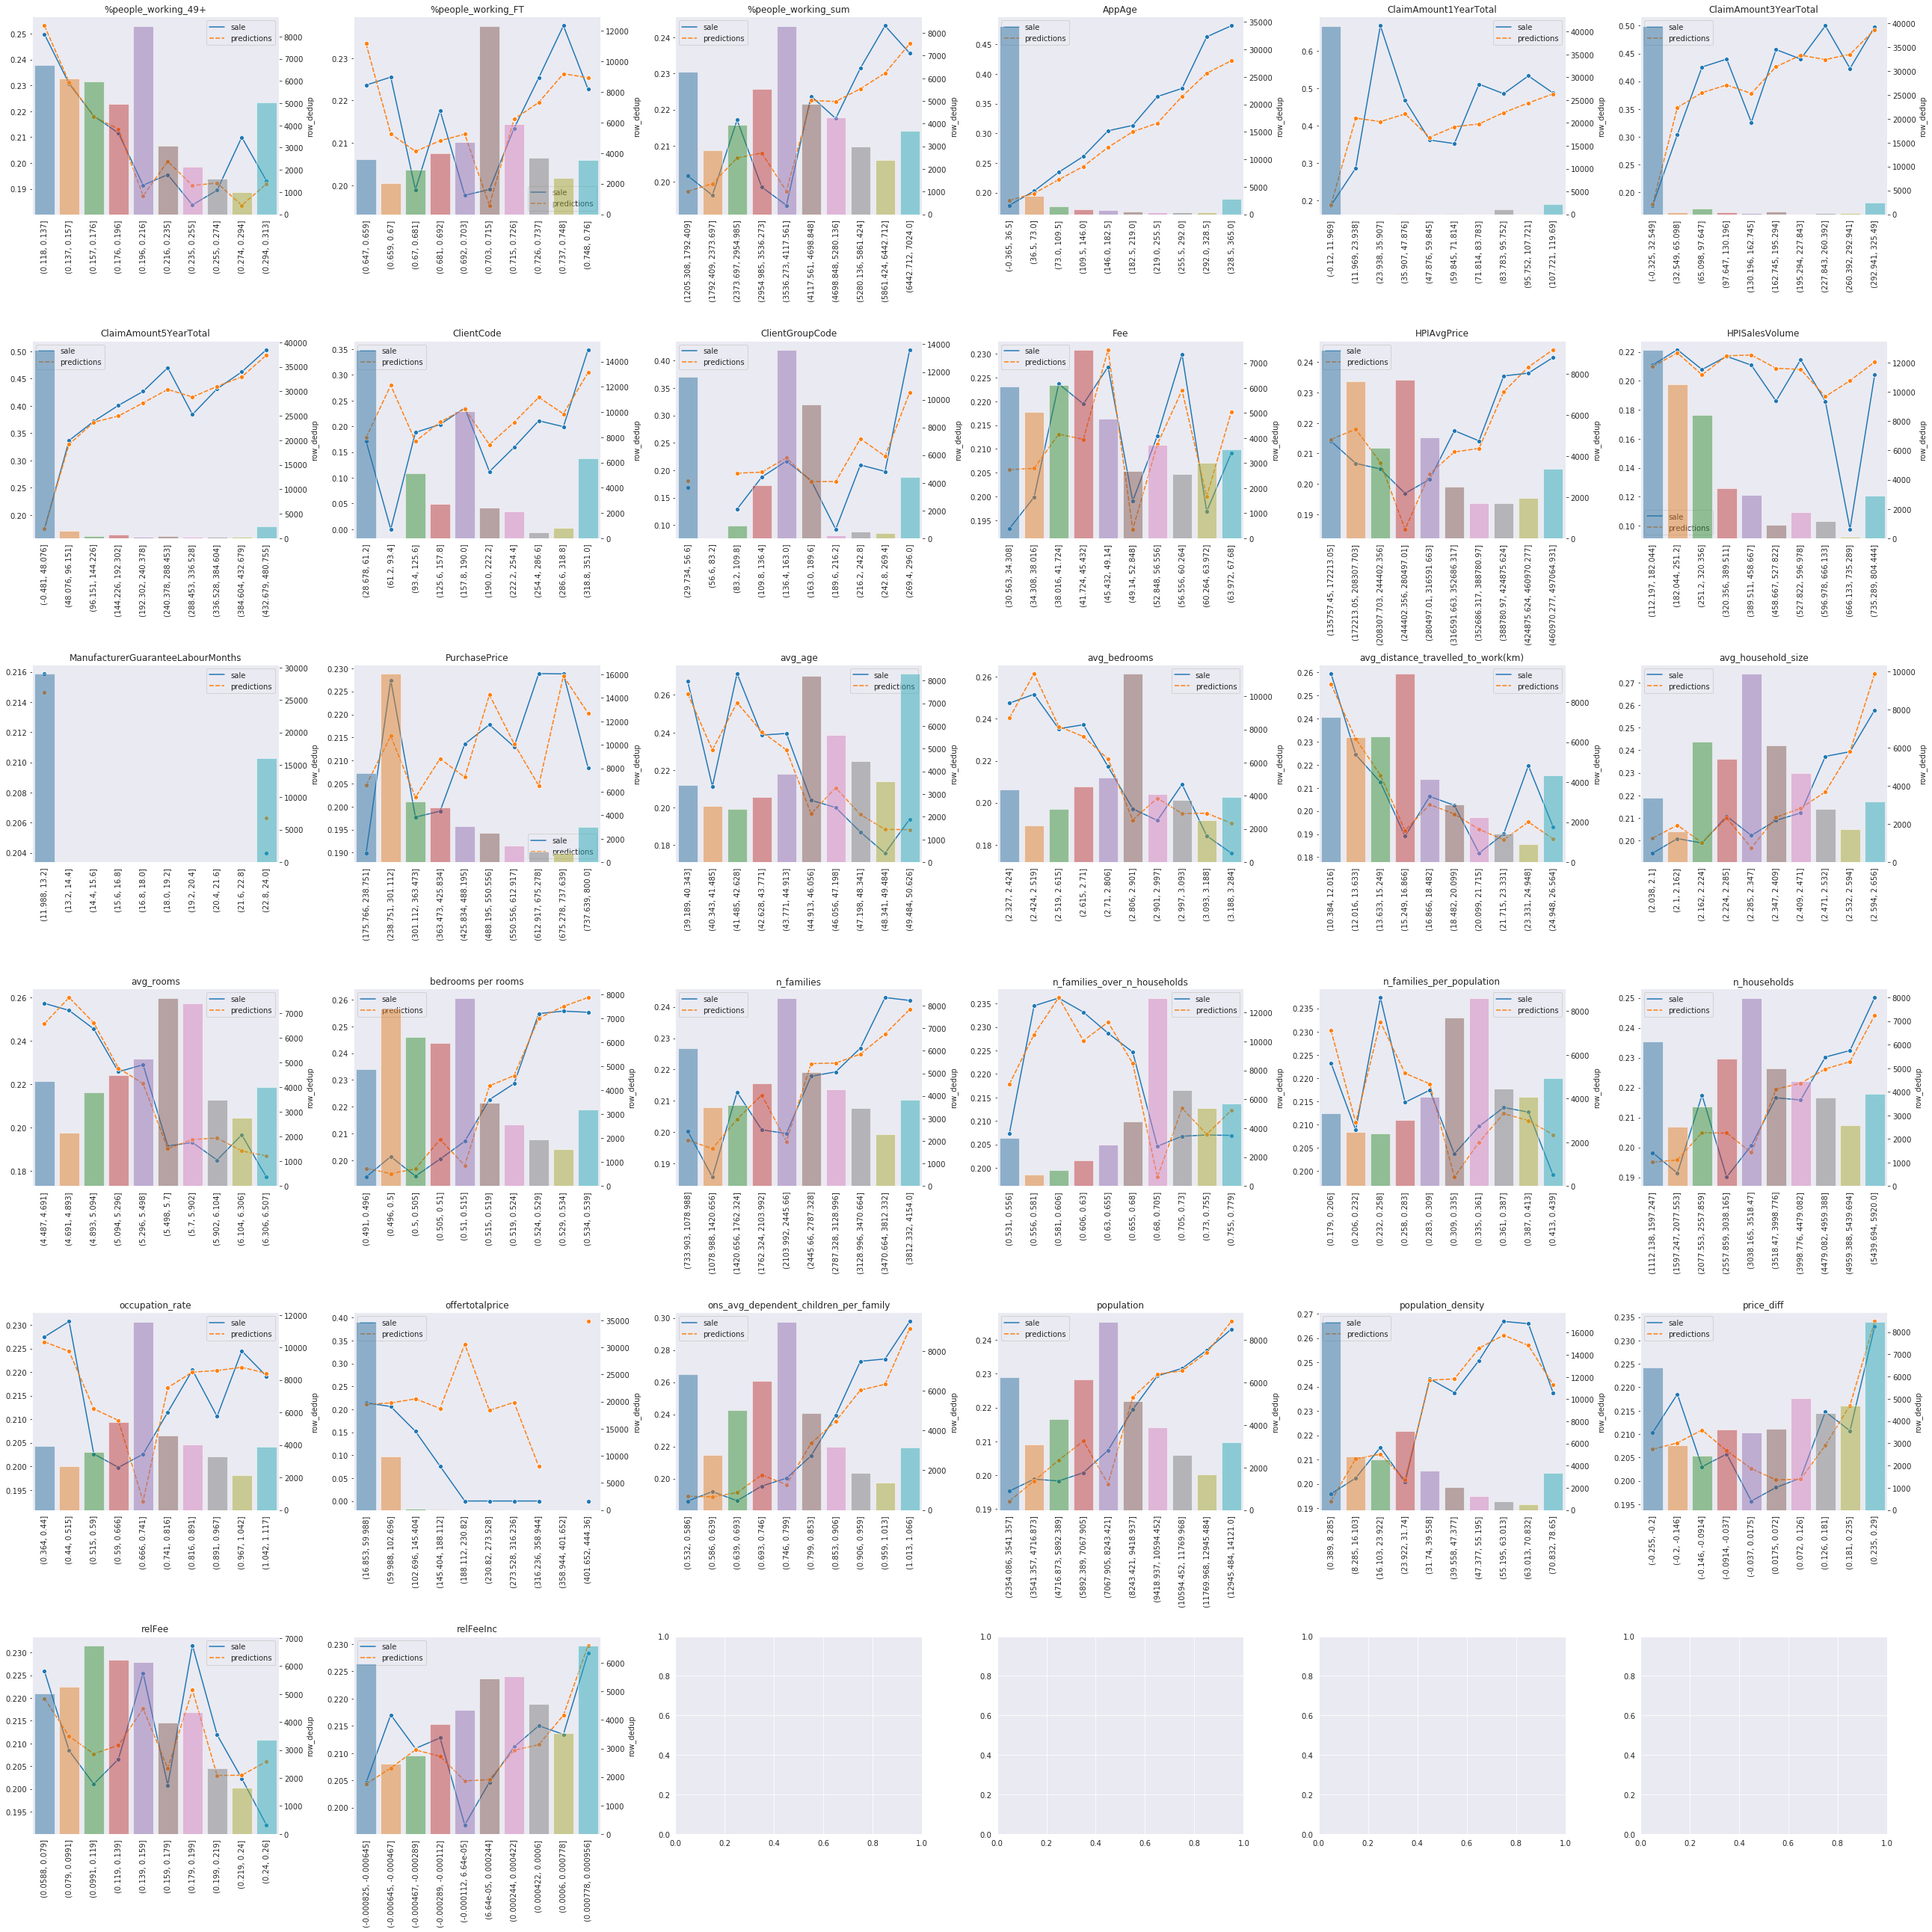

In [62]:
num_features = [f for f in df1.select_dtypes(include=['int32', 'float64']).columns.sort_values() if f not in ['predictedconversionrate', 'totalprice']]
num_plot_with_pred(df= df_pred.sample(frac= .1), feat_lst= num_features, rows= int(np.ceil(len(num_features)/6)), cols=6, target='sale', y='row_dedup', pred='predictions', nbins=10, target_lim = None)

<Figure size 432x288 with 0 Axes>

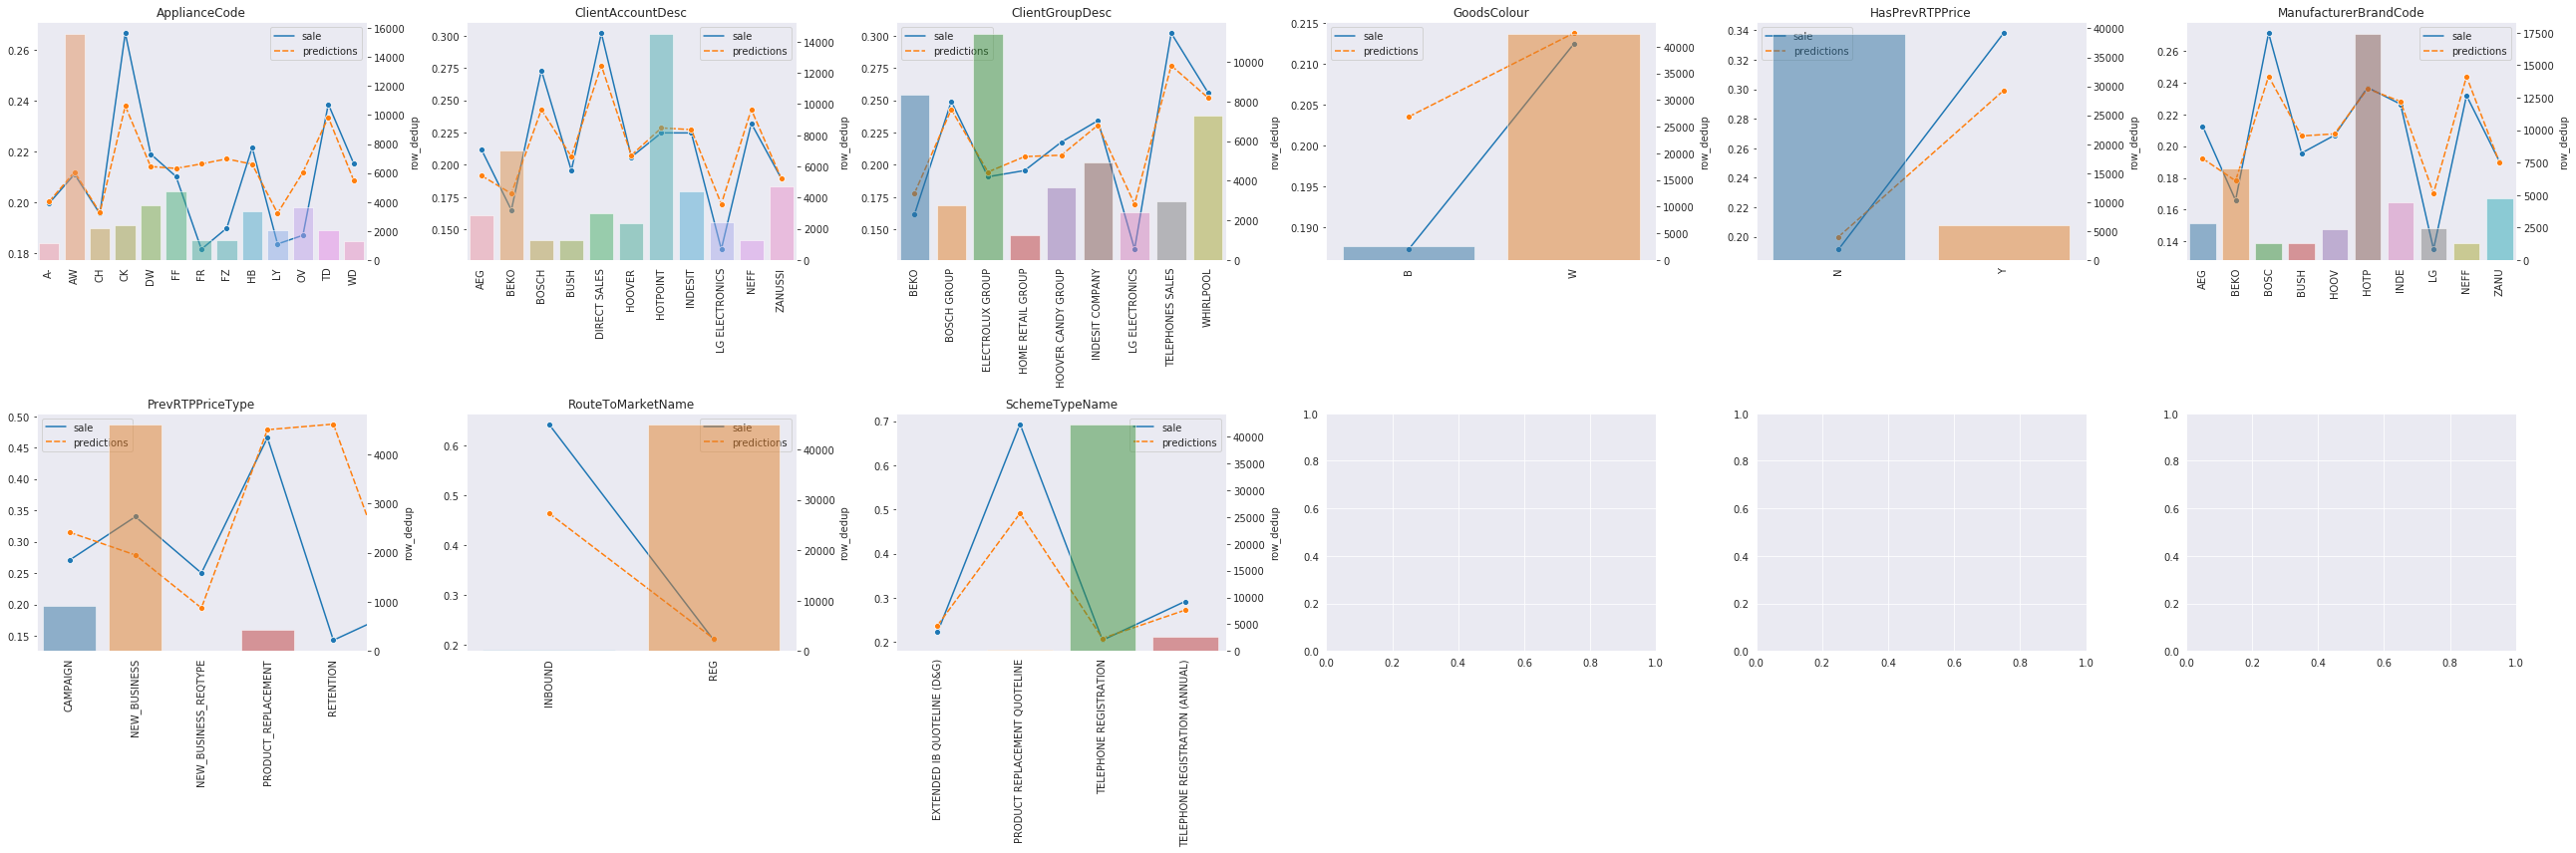

In [63]:
cat_features = [f for f in df1.select_dtypes(include=['object']).columns.sort_values() if f not in ['PaymentType', 'pricingversiondescription', 'PerPostalAddrPostCode']]
cat_plot_with_pred(df= df_pred.sample(frac= .1), feat_lst= cat_features, rows= int(np.ceil(len(cat_features)/6)), cols=6, target='sale', y='row_dedup', pred='predictions')